In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 15, 20

<class 'ModuleNotFoundError'>: No module named 'seaborn'

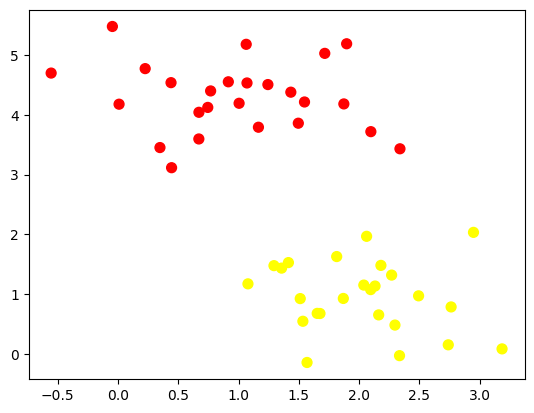

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

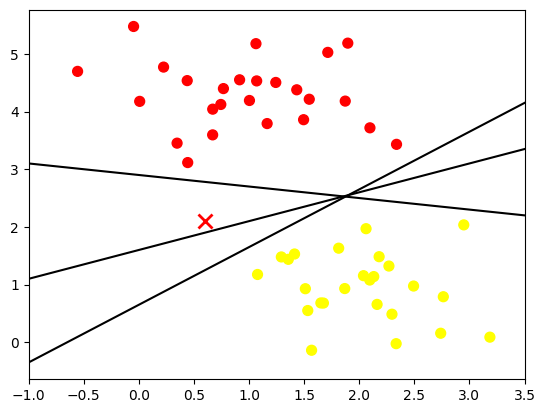

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

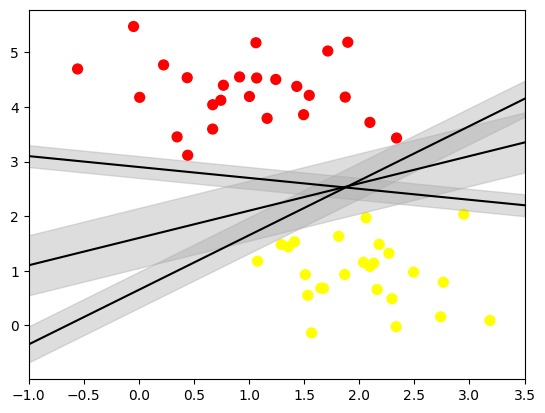

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

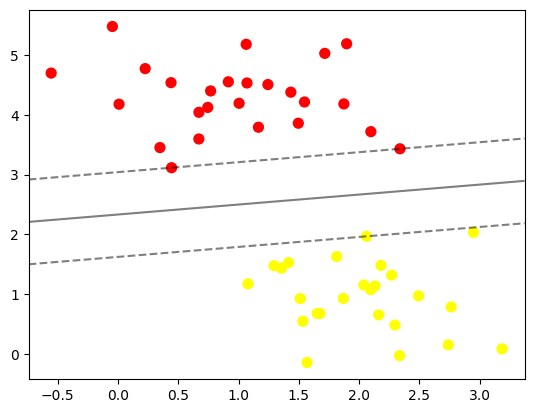

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

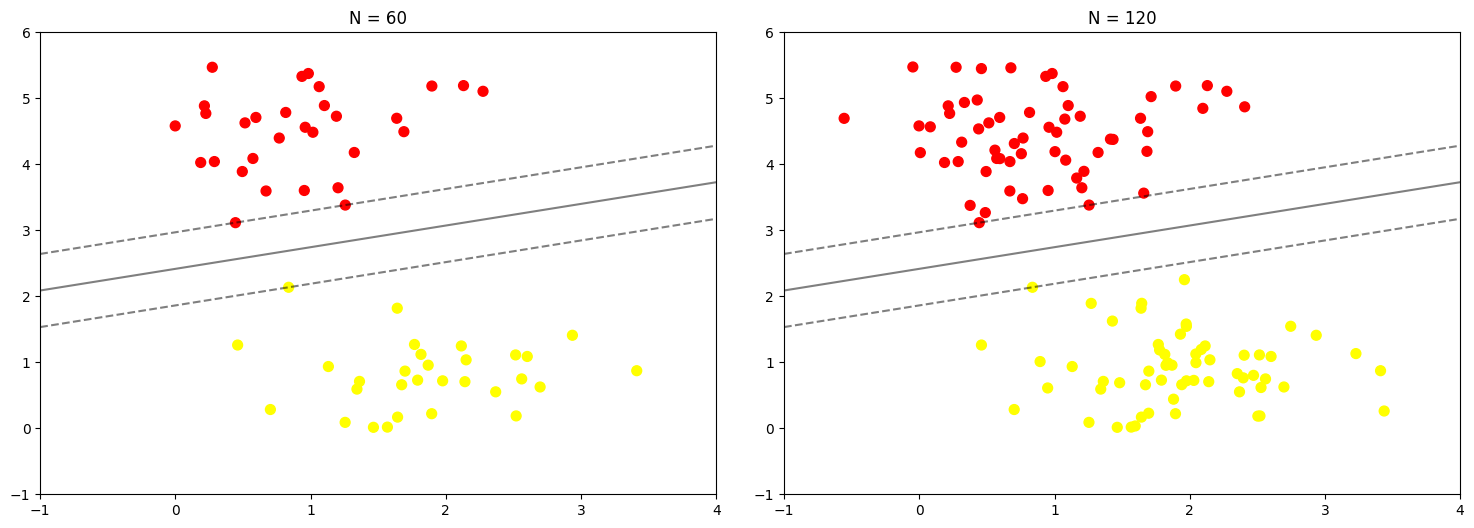

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

<class 'ModuleNotFoundError'>: No module named 'ipywidgets'

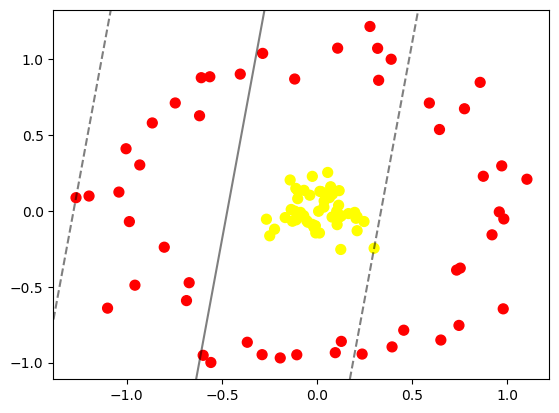

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [11]:
X

array([[-1.26723762,  0.08688585],
       [-0.22378323, -0.1208267 ],
       [ 0.23655708, -0.94382578],
       [-1.10144198, -0.64121507],
       [ 0.38915229,  0.99937028],
       [ 0.11931158, -0.03961492],
       [ 0.58983778,  0.71066675],
       [-0.10204674,  0.08043809],
       [-0.60891597,  0.87767414],
       [-0.04862986, -0.0749245 ],
       [-0.00715502, -0.14533509],
       [ 0.10512955, -0.09089386],
       [ 0.24643161, -0.07012344],
       [ 0.0711658 ,  0.15904484],
       [-0.98685559, -0.07075893],
       [-0.03857156,  0.1032212 ],
       [ 0.45522647, -0.78661951],
       [ 0.03685072,  0.06525327],
       [-1.04181806,  0.12383048],
       [ 0.39384585, -0.89659806],
       [ 0.12705586, -0.86014855],
       [ 0.2777232 ,  1.21530412],
       [ 0.07859431, -0.04105008],
       [-0.01661175, -0.10858864],
       [ 0.01224218, -0.14580709],
       [ 0.29947717, -0.24635092],
       [ 0.16465583, -0.01793475],
       [-0.02524777,  0.2274416 ],
       [-0.13630231,

In [12]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [13]:
(X ** 2).sum(1)

array([1.61344033e+00, 6.46780226e-02, 9.46766355e-01, 1.62433121e+00,
       1.15018046e+00, 1.58045946e-02, 8.52955849e-01, 1.68838234e-02,
       1.14109055e+00, 7.97854438e-03, 2.11734837e-02, 1.93139169e-02,
       6.56458332e-02, 3.03598340e-02, 9.78890787e-01, 1.21423826e-02,
       8.26001381e-01, 5.61596489e-03, 1.10071885e+00, 9.59002642e-01,
       7.55998712e-01, 1.55409429e+00, 7.86217417e-03, 1.20674438e-02,
       2.14095794e-02, 1.50375352e-01, 2.74331968e-02, 5.23671327e-02,
       1.86630925e-02, 1.15928133e+00, 4.41741384e-02, 1.06173489e+00,
       1.02927967e+00, 9.65684941e-01, 4.56187682e-02, 1.26522801e+00,
       7.40251107e-02, 9.75715382e-01, 2.81907237e-02, 1.37532500e-02,
       1.73327194e-02, 7.01078470e-01, 9.11085276e-01, 6.76635565e-01,
       1.06226595e-02, 3.44804811e-02, 7.75200277e-03, 8.56704317e-03,
       1.09915514e+00, 1.62872546e-02, 3.01035955e-02, 2.30662843e-02,
       1.19058833e-02, 1.25937603e+00, 6.15676796e-02, 1.65428698e-02,
      

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

<class 'ModuleNotFoundError'>: No module named 'ipywidgets'

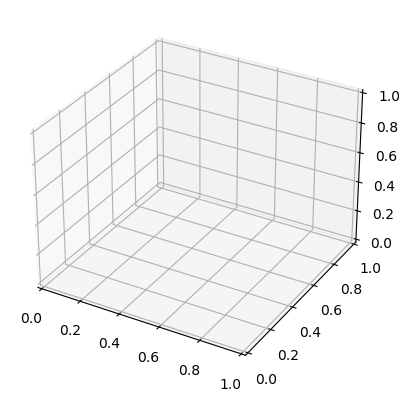

<class 'NameError'>: name 'r' is not defined

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

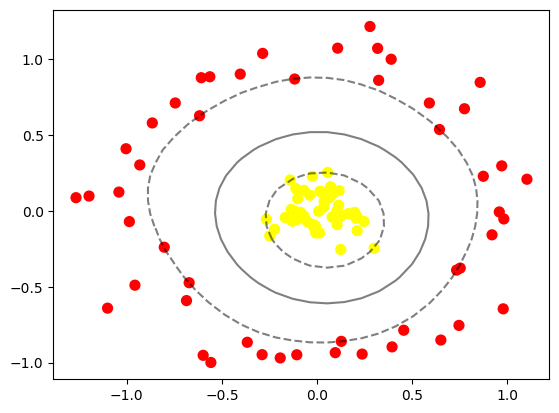

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

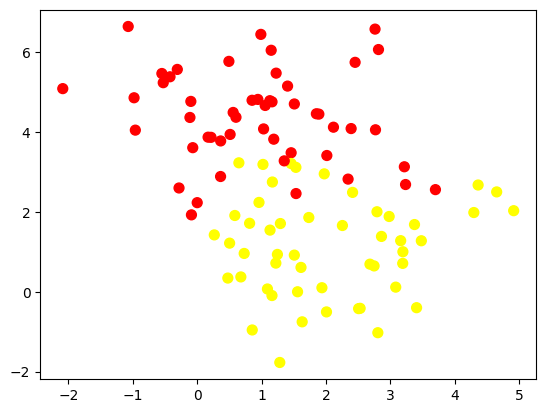

In [18]:

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

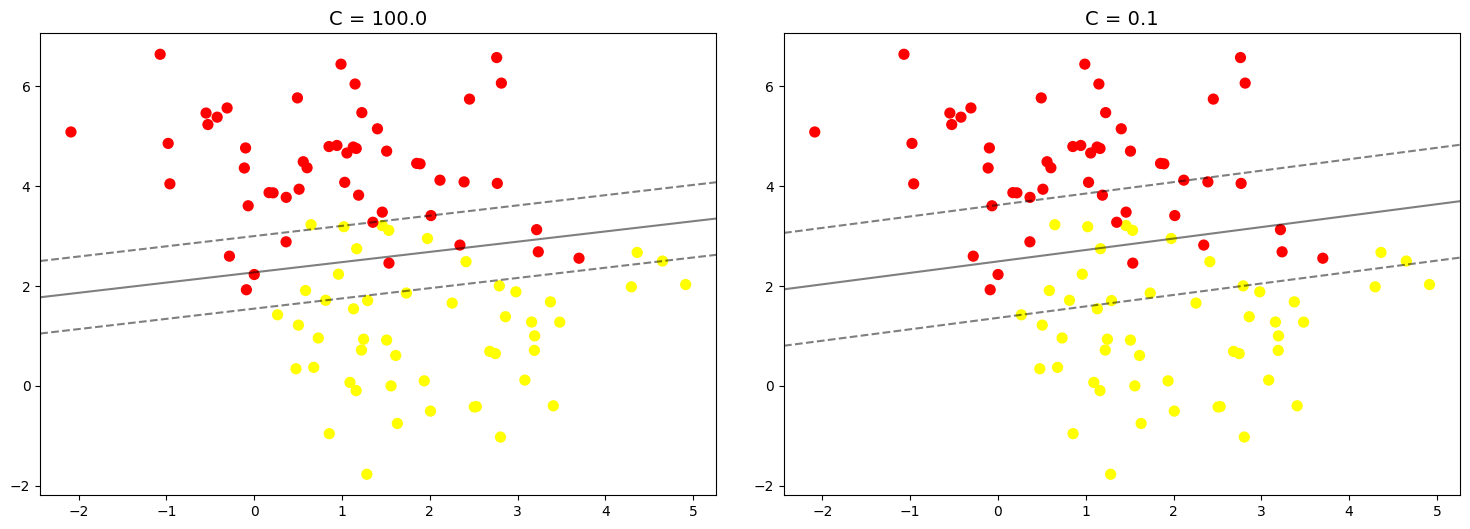

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

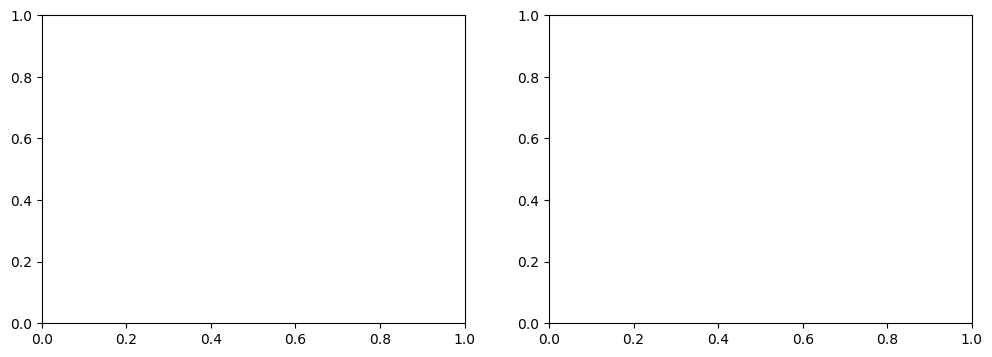

<class 'NameError'>: name 'sigmoid' is not defined

In [20]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()
